# **Real Estate Price Prediction**


# **Table of Contents**
1. [Introduction](#1)
1. [Import Libraries](#2)
1. [Load and Split Data](#3)
1. [Data Understanding](#4)
1. [Data Preparation](#5)
  * [Drop Outliers](#6)
  * [Check Correlation](#7)
  * [Preprocessing Data](#8)


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **1. Introduction**

The dataset we'll be analyzing is the dataset which is scrapped from Immoweb.be in Belgium. It shows the information of each house and appartement to sale. This dataset has 52.077 rows and 20 columns.

#### **Attributes:**
The metadata of the columns:

* "locality" - postal code of the house/appartement
* "type_of_property" - the count of a new bike shares
* "subtype_of_property" - real temperature in C
* "price" - temperature in C "feels like"
* "type_of_sale" - humidity in percentage
* "number_of_rooms" - wind speed in km/h
* "house_area" - category of the weather
* "fully_equipped_kitchen" - boolean field - 1 holiday / 0 non holiday
* "open_fire" - boolean field - 1 if the day is weekend
* "terrace" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
* "terrace_area" - category
* "garden" - category
* "garden_area" - category
* "surface_of_the_land" - category
* "surface_of_the_plot_of_land" - category
* "number_of_facades" - category
* "swimming_pool" - category
* "state_of_the_building" - category
* "construction_year" - category

But in this dataset, we don't have the information related longitude and lattitude of each city. So we use also the [zipcode data of Belgium](https://github.com/jief/zipcode-belgium/blob/master/zipcode-belgium.csv). 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="2"></a> <br>
# **2. Imports**

In [1]:
# Load data libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Load and Split the Data**

In [2]:
# First, let's load the data
df = pd.read_csv("../data/dataset_house_apartment.csv")

df.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203.0,1,NaN,0,1,NaN,0,NaN,95.0,NaN,2.0,0,to be done up,1901.0
1,1880,house,villa,525000,for sale,6.0,250.0,1,NaN,0,1,40.0,1,430.0,826.0,NaN,4.0,0,as new,1992.0
2,4900,house,exceptional property,550000,for sale,11.0,475.0,1,NaN,0,1,NaN,1,1400.0,1543.0,NaN,4.0,0,good,1853.0
3,7912,house,villa,550000,for sale,4.0,325.0,1,NaN,0,1,125.0,1,2333.0,3570.0,NaN,4.0,0,good,1918.0
4,6032,house,house,550000,for sale,5.0,400.0,1,NaN,0,1,80.0,1,500.0,616.0,NaN,3.0,0,as new,1977.0


In [3]:
df.shape

(52077, 20)

In [7]:
# Load zipcode data of Belgium
zipcode = pd.read_csv("../data/code-postaux-belge.csv", sep=";")

In [8]:
zipcode.head()

,column_1,column_2,column_3,column_4,coordonnees,geom
0,1060,Saint-Gilles,4.345668,50.826741,"50.8267409, 4.345668",NaN
1,1080,Molenbeek-Saint-Jean,4.322778,50.854355,"50.8543551, 4.3227779",NaN
2,1083,Ganshoren,4.317510,50.871240,"50.8712396, 4.3175103",NaN
3,1120,Neder-Over-Heembeek,4.390489,50.897796,"50.89779605, 4.39048886842",NaN
4,1300,Wavre,4.607744,50.716419,"50.7164189, 4.607744",NaN


In [9]:
# Drop empty columns
zipcode.drop(columns=["coordonnees", "geom"], inplace=True)

# Rename the columns
zipcode.rename(
    columns={
        "column_1": "locality",
        "column_2": "city_name",
        "column_3": "lattitude",
        "column_4": "longitude",
    },
    inplace=True,
)

# Drop the localities' duplicates
zipcode.drop_duplicates(subset=["locality"], inplace=True)

In [10]:
zipcode.shape

(1145, 4)

Merge real estate data and zipcode data

In [11]:
dfinal = pd.merge(df, zipcode, on=["locality"], how="inner")

In [12]:
dfinal.shape

(52076, 23)

In [13]:
dfinal.head(5)

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,...,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year,city_name,lattitude,longitude
0,1050,house,house,340000,for sale,6.0,203.0,1,NaN,0,...,NaN,95.0,NaN,2.0,0,to be done up,1901.0,Ixelles,4.381571,50.822285
1,1050,house,mixed use building,520000,for sale,4.0,200.0,0,NaN,0,...,NaN,69.0,NaN,2.0,0,to renovate,1940.0,Ixelles,4.381571,50.822285
2,1050,house,house,no price,for sale,6.0,NaN,1,NaN,0,...,NaN,0.0,NaN,NaN,0,NaN,1910.0,Ixelles,4.381571,50.822285
3,1050,house,house,599000,for sale,4.0,160.0,1,NaN,0,...,55.0,100.0,NaN,2.0,0,to be done up,1898.0,Ixelles,4.381571,50.822285
4,1050,house,house,599000,for sale,3.0,160.0,1,NaN,0,...,60.0,130.0,NaN,2.0,0,good,1953.0,Ixelles,4.381571,50.822285


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="4"></a> <br>
# **4. Data Understanding**

In [14]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52076 entries, 0 to 52075
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     52076 non-null  int64  
 1   type_of_property             52076 non-null  object 
 2   subtype_of_property          52076 non-null  object 
 3   price                        52076 non-null  object 
 4   type_of_sale                 52076 non-null  object 
 5   number_of_rooms              52074 non-null  float64
 6   house_area                   43444 non-null  float64
 7   fully_equipped_kitchen       52076 non-null  int64  
 8   furnished                    0 non-null      float64
 9   open_fire                    52076 non-null  int64  
 10  terrace                      52076 non-null  int64  
 11  terrace_area                 17518 non-null  float64
 12  garden                       52076 non-null  int64  
 13  garden_area     

Check number of duplicated rows in data and drop these rows

In [15]:
dfinal.duplicated().sum()

1235

In [16]:
dfinal.drop_duplicates(inplace=True)

In [17]:
# rename columns name 'locality' to 'postal_code'

dfinal.rename(columns={"locality": "postal_code"}, inplace=True)

In [18]:
# Drop columns with only 1 unique value
dfinal.drop(
    columns=["type_of_sale", "furnished", "surface_of_the_plot_of_land"], inplace=True
)
dfinal.shape

(50841, 20)

In [19]:
dfinal.describe()

,postal_code,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,number_of_facades,swimming_pool,construction_year,lattitude,longitude
count,50841.000000,50839.000000,42411.000000,50841.000000,50841.000000,50841.000000,17096.000000,50841.000000,8350.000000,29001.000000,37735.000000,50841.000000,29883.000000,50841.000000,50841.000000
mean,5388.526799,2.828281,154.722855,0.654511,0.047304,0.562971,23.827737,0.291615,715.837006,999.309644,2.768120,0.015676,1983.587525,4.278681,50.849746
std,2958.833929,2.221271,185.139615,0.475532,0.212291,0.496024,30.320098,0.454510,4336.640576,5055.118738,0.860077,0.124221,37.456650,0.832404,0.329291
min,1000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1755.000000,2.580670,49.508502
25%,2600.000000,2.000000,91.000000,0.000000,0.000000,0.000000,9.000000,0.000000,70.000000,143.000000,2.000000,0.000000,1963.000000,3.678904,50.662433
50%,5030.000000,3.000000,130.000000,1.000000,0.000000,1.000000,16.000000,0.000000,186.000000,351.000000,3.000000,0.000000,1992.000000,4.351559,50.870452
75%,8420.000000,3.000000,186.000000,1.000000,0.000000,1.000000,30.000000,1.000000,540.000000,814.000000,4.000000,0.000000,2018.000000,4.835996,51.104485
max,9992.000000,204.000000,31700.000000,1.000000,1.000000,1.000000,1150.000000,1.000000,312600.000000,400000.000000,4.000000,1.000000,2048.000000,6.300938,51.474352


Check misisng values in data

In [20]:
dfinal.isnull().sum()

postal_code                   0
type_of_property              0
subtype_of_property           0
price                         0
number_of_rooms               2
house_area                 8430
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
terrace_area              33745
garden                        0
garden_area               42491
surface_of_the_land       21840
number_of_facades         13106
swimming_pool                 0
state_of_the_building     13171
construction_year         20958
city_name                     0
lattitude                     0
longitude                     0
dtype: int64

In [22]:
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(
        ascending=False
    )
    missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
    print(missing_data)

In [25]:
print("Percentage Missing Value %")
display_only_missing(dfinal)

Percentage Missing Value %
                       Missing Ratio
garden_area                83.576248
terrace_area               66.373596
surface_of_the_land        42.957456
construction_year          41.222635
state_of_the_building      25.906257
number_of_facades          25.778407
house_area                 16.581106
number_of_rooms             0.003934


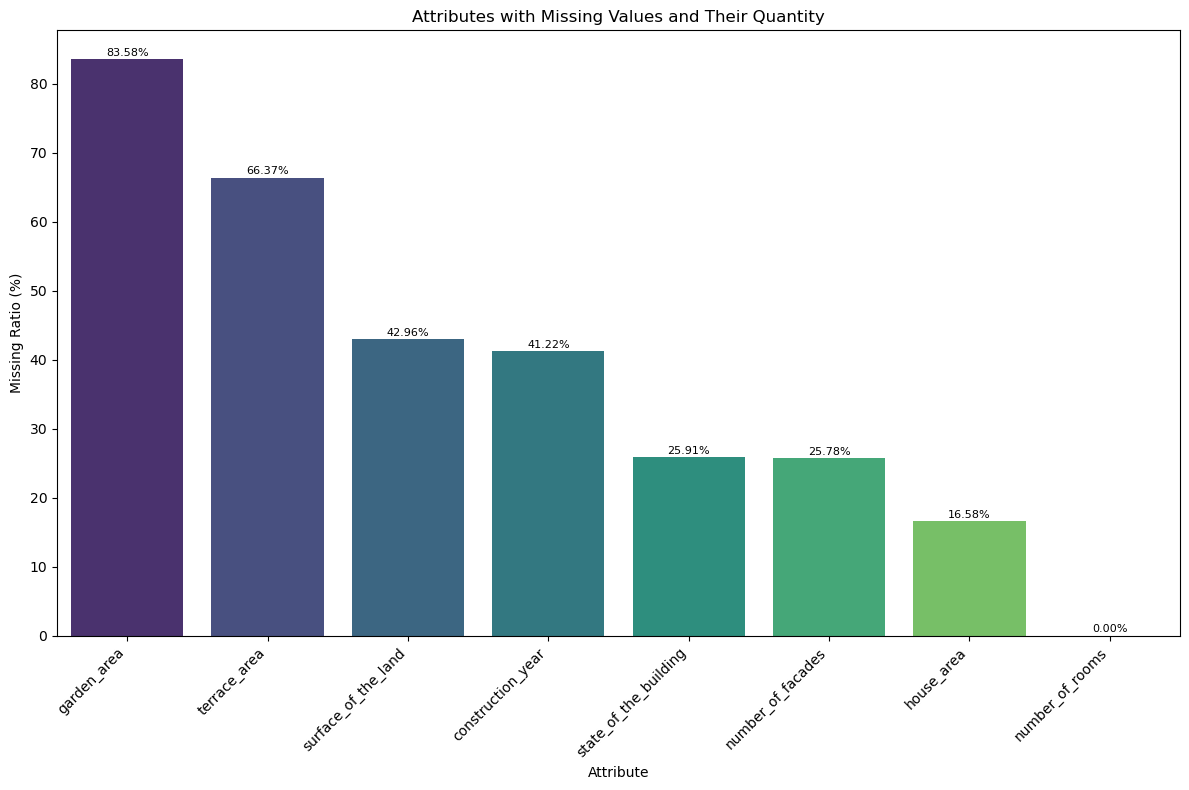

In [31]:
# Calculate the missing ratio for each attribute
missing_ratio = (dfinal.isnull().sum() / len(dfinal)) * 100

# Create a DataFrame to store the missing values information
missing_data = pd.DataFrame(
    {"Attribute": dfinal.columns, "MissingRatio": missing_ratio}
)
missing_data = missing_data[missing_data["MissingRatio"] > 0].sort_values(
    by="MissingRatio", ascending=False
)

# Plot the missing values with values at the top of each bar
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x="Attribute", y="MissingRatio", data=missing_data, palette="viridis"
)

# Add values at the top of each bar
for index, value in enumerate(missing_data["MissingRatio"]):
    barplot.text(
        index,
        value + 0.2,
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        fontsize=8,
        color="black",
    )

plt.title("Attributes with Missing Values and Their Quantity")
plt.xlabel("Attribute")
plt.ylabel("Missing Ratio (%)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We have so 51532 instances with 23 different variables to work on.

<a id="4"></a> <br>
# **5. Data Understanding**